Meu computador, meu laboratório
===============================



## Objetivo



Elabore uma pergunta/hipótese e teste ela usando um experimento computacional. Mostre graficamente um histograma dos resultados obtidos nas suas simulações e discuta se conseguiu responder sua pergunta/hipótese. Tente ser criativo e realizar um experimento suficientemente diferente dos realizados em sala.

Sugestões de situações/processos para simular:

-   Baralho de cartas (ex: qual a chance de sortear 5 cartas do mesmo naipe ou qual a chance sortear 3 cartas em ordem crescente. Pode pensar em aplicações em jogos como Poker ou Truco pois, afinal, a probabilidade nasceu nos jogos de azar);
-   Jogos de tabuleiros (pensar em estratégias de otimização assim como as discutidas sobre o jogo Catan em aula);
-   Datas de aniversário (ex: qual chance de pelo menos duas pessoas fazerem aniversário no mesmo dia num grupo de $n$ pessoas)

Escolha o experimento que preferir, não precisa se limitar às sugestões.



## Resultado e discussão



### Pergunta Motivadora:
"Qual a probabilidade de quem em um jogo de rpg converncional (dungeons and dragons), de que um jogador crite (tire o maior valor do dado) em um d20, considerando desvantagem na rolagem (jogar duas vezes o mesmo dado e pegando o menor valor)."

In [1]:
from random import choice
import statistics as st

possiveis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

def rolar_d20(lista):
    return choice(lista)

def d20_dvt(lista):
    rolada = choice(lista)
    rolada2 = choice(lista)
    if rolada <= rolada2:
        return rolada
    else:
        return rolada2

print(rolar_d20(possiveis))
print(d20_dvt(possiveis))

4
5


Considerando uma estimativa de 1000 roladas de dados de 20 lados durante uma sessão extremamente longa de rpg que só tem nerd muito esquisito e sem nada pra fazer (nós), onde seu personagem pode estar normal ou com desvantagem, aqui vai uma análise da moda de cada tipo de rolada. 

In [27]:
def jogar_1000():
    resultado1 = []
    resultado2 = []
    for _ in range(1000):
        resultado1.append(rolar_d20(possiveis))
        resultado2.append(d20_dvt(possiveis))
    return resultado1, resultado2

normal, dvt = jogar_1000()
moda1 = st.mode(normal)
moda2 = st.mode(dvt)

print(f'A moda da rolagem normal é de: {moda1}')
print(f'A moda da rolagem com desvantagem é de: {moda2}')

A moda da rolagem normal é de: 3
A moda da rolagem com desvantagem é de: 1


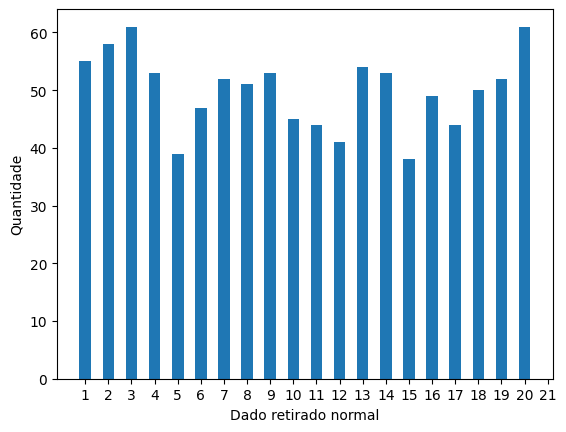

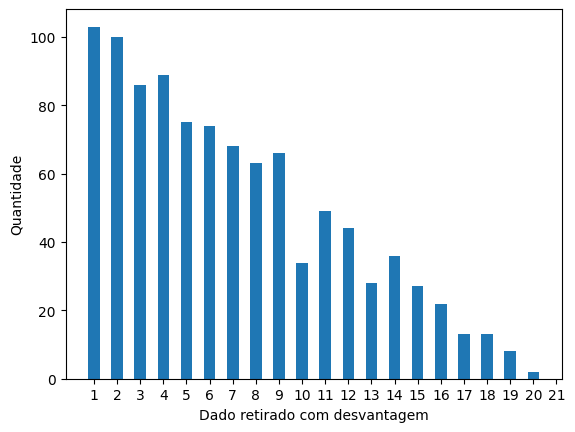

In [28]:
import matplotlib.pyplot as plt

def histograma(n, label):
    figura, eixo = plt.subplots()
    eixo.hist(n, bins=range(1, 22), align="left", rwidth=0.5)
    eixo.set_xticks(range(1, 22))
    eixo.set_xlabel(f'Dado retirado {label}')
    eixo.set_ylabel("Quantidade")

histograma(normal, "normal")
histograma(dvt, "com desvantagem")

É notável que para uma população grande de dados, a moda das rolagens se adaptam às condições impostas. Para as rolagens de desvantagens, as modas davam menor que 3. Já para a rolagem normal, a moda varia completamente, indo de literalmente 20 a 1. 
Portanto, quando você tem algum tipo de habilidade que pode degradar sua "sorte" ou aumentá-la, é consideravelmente recomendável que você use isso a seu favor, seja isso equipando ou desequipando o item/magia/etc.

In [30]:
contador1 = 0
contador2 = 0

for i in dvt:
    if i == 20:
        contador1 += 1
for j in normal:
    if j == 20:
        contador2 += 1
        
print(f'A probabilidade de critar em um d20 com desvantagem é de {(contador1/len(dvt))*100}%')
print(f'A probabilidade de critar em um d20 normalmente é de {(contador2/len(normal))*100}%')


A probabilidade de critar em um d20 com desvantagem é de 0.2%
A probabilidade de critar em um d20 normalmente é de 6.1%


## Referências



Escreva nesta seção as referências consultadas.

https://pt.stackoverflow.com/questions/556270/como-fazer-a-contagem-de-números-consecutivos-iguais-em-uma-lista-em-python
https://www.geeksforgeeks.org/itertools-groupby-in-python/

https://statmodeling.stat.columbia.edu/2014/07/12/dnd-5e-advantage-disadvantage-probability/

https://rpg.stackexchange.com/questions/72045/natural-20-when-rolling-with-disadvantage

Dungeons & Dragons - Core Rule set

## Playground

